# Modelos basados en árbol / Predicción de Precios de Vehículos Usados (Core)

implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.

## Requisitos:

### 1. Carga y Exploración de Datos:

* Descargar y cargar el dataset.
* Realizar una exploración inicial para entender la estructura del dataset.
* Identificar valores faltantes, duplicados y outliers.

### 2. Limpieza y Preprocesamiento:

* Manejar valores faltantes.
* Eliminar duplicados.
* Corregir inconsistencias en los datos categóricos.
* Escalar las características numéricas.
* Realizar transformaciones necesarias para las características categóricas.

### 3. Exploración de Datos:

* Crear visualizaciones univariadas y multivariadas.
* Calcular estadísticas descriptivas.

### 4. Modelado y Evaluación:

* Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
* Evaluar los modelos utilizando MSE, RMSE, y R^2.
* Seleccionar el mejor modelo basado en las métricas de evaluación.

### 5. Optimización del Modelo:

* Optimizar el modelo seleccionado utilizando GridSearchCV.

### 6. Documentación y Entrega:

* Documentar todo el proceso en un archivo .ipynb claramente comentado.
* Crear visualizaciones con interpretaciones.
* Subir el archivo a un repositorio en GitHub con un tag de liberación.

### Dataset:

[Used Cars Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data)

# Resolución

## 1. Carga y Exploración de Datos

### Descargar y cargar el dataset.

Primero, descargamos el dataset de Kaggle.

In [4]:
from git_utils import get_repo_file_path
from kaggle_utils import descargar_dataset_kaggle


# Asegúrarse de que el archivo kaggle.json con las credenciales de kaggle
# estén en el directorio base del repositorio.
kaggle_credentials_path = get_repo_file_path("kaggle.json")

descargar_dataset_kaggle(
    "https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data",
    kaggle_credentials_path,
    "../data/",
)

Skipping, found downloaded files in "../data/craigslist-carstrucks-data" (use force=True to force download)


Luego, cargamos este dataset en un dataframe.

In [5]:
import pandas as pd

camino_ds = "../data/craigslist-carstrucks-data/vehicles.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### Realizar una exploración inicial para entender la estructura del dataset.

Verificamos la cabecera.

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


Obtenemos datos estadísticos del dataframe

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02


Lo primero a notar, es que los precios tienen un valor máximo muy alto, por lo que esto se debe corroborar más adelante.

Obtenemos los nombres de campos.

In [8]:
from eda_utils import obtener_columnas

columnas = obtener_columnas(df)

columnas

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [9]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  Int64  
 1   url           426880 non-null  string 
 2   region        426880 non-null  string 
 3   region_url    426880 non-null  string 
 4   price         426880 non-null  Int64  
 5   year          425675 non-null  Int64  
 6   manufacturer  409234 non-null  string 
 7   model         421603 non-null  string 
 8   condition     252776 non-null  string 
 9   cylinders     249202 non-null  string 
 10  fuel          423867 non-null  string 
 11  odometer      422480 non-null  Int64  
 12  title_status  418638 non-null  string 
 13  transmission  424324 non-null  string 
 14  VIN           265838 non-null  string 
 15  drive         296313 non-null  string 
 16  size          120519 non-null  string 
 17  type          334022 non-null  string 
 18  pain

Verificamos las columnas categóricas

In [10]:
from eda_utils import obtener_columnas_categoricas_df

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['url',
 'region',
 'region_url',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'state',
 'posting_date']

### Identificar valores faltantes, duplicados y outliers.

Valores faltantes:

In [11]:
from eda_utils import obtener_estadisticas_datos_nulos

obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
county,0,426880,100.00
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93


Valores duplicados:

In [12]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

del duplicados
del cant_registros_duplicados

Cant. de Registros Duplicados general: 0


Outliers:

In [13]:
from eda_utils import obtener_datos_outliers_df

datos_outliers = obtener_datos_outliers_df(df).T

datos_outliers

/Users/diego/Documents/Programacion/ds_bootcamp/coding-dojo-ds-bootcamp/machine_learning/1_modelos_de_regresion/3_prediccion_precios_vehiculos_usados/notebooks/eda_utils.py:154: RuntimeWarning: invalid value encountered in scalar divide
  porcentaje_outliers = (outliers.count() / df[columna].count()) * 100


,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
id,44.0,0.010307,7297478032.875,7325918849.875
price,8177.0,1.915527,-24978.625,57364.375
year,15896.0,3.734304,1994.5,2030.5
odometer,4385.0,1.037919,-106053.75,277300.25
county,0,NaN,<NA>,<NA>
lat,6413.0,1.525702,22.9064,54.0944
long,195.0,0.046392,-158.601559,-34.170327


In [14]:
del datos_outliers

## Limpieza y Preprocesamiento:

### Corregir inconsistencias en datos categóricos.

Limpiamos las columnas

In [15]:
from eda_utils import limpiar_cadena

columnas_a_excluir = ["url", "region_url", "image_url"]

columnas_categoricas_potenciales = [*columnas_categoricas]

for columna in columnas_a_excluir:
    columnas_categoricas_potenciales.remove(columna)

for columna_categorica in columnas_categoricas:
    df[columna_categorica] = df[columna_categorica].apply(limpiar_cadena)

Para convertir las columnas categóricas, el criterio que elegimos para determinar si una es category o no, es si la cantidad de únicos en esa columna es un monto pequeño (por ej, menor al 10% del tamaño del dataset). Se elige este acercam

In [16]:
porcentaje_max_columnas_categoricas = 0.10
cant_filas_df = df.shape[0]

columnas_a_excluir = ["url", "region_url", "image_url"]
columnas_convertidas_a_categoricas = []

for columna in columnas_categoricas:
    valores_unicos = df[columna].dropna().unique()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (0.1 * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}'")

    del valores_unicos

print(f"\nColumnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")

Cant. únicos para columna 'url': 426880
No se convierte la columna 'url'
Cant. únicos para columna 'region': 404
Valores únicos columna 'region': ['prescott' 'fayetteville' 'florida keys' 'worcester / central ma'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / sji' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa ma

In [17]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  Int64   
 1   url           426880 non-null  string  
 2   region        426880 non-null  category
 3   region_url    426880 non-null  category
 4   price         426880 non-null  Int64   
 5   year          425675 non-null  Int64   
 6   manufacturer  409234 non-null  category
 7   model         421603 non-null  category
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  Int64   
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  string  
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

Ahora, verificamos las columnas booleanas. 

In [18]:
columnas = obtener_columnas(df)

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    set([0, 1]),
    set([0.0, 1.0]),
    set(["false", "true"]),
    set(["no", "yes"]),
    set(["no", "si"]),
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "no"]:
        return False

    if x in [1, 1.0, "true", "yes", "si"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == posibilidad_valores_booleanos:
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

            columna_booleana_encontrada = True
            break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Columnas convertidas a booleanas: []


Al parecer, no se encontraron columnas booleanas.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  Int64   
 1   url           426880 non-null  string  
 2   region        426880 non-null  category
 3   region_url    426880 non-null  category
 4   price         426880 non-null  Int64   
 5   year          425675 non-null  Int64   
 6   manufacturer  409234 non-null  category
 7   model         421603 non-null  category
 8   condition     252776 non-null  category
 9   cylinders     249202 non-null  category
 10  fuel          423867 non-null  category
 11  odometer      422480 non-null  Int64   
 12  title_status  418638 non-null  category
 13  transmission  424324 non-null  category
 14  VIN           265838 non-null  string  
 15  drive         296313 non-null  category
 16  size          120519 non-null  category
 17  type          334022 non-null

Finalmente, convertimos la columna posting_date a datetime.

In [20]:
df[df["posting_date"].notna()]["posting_date"].head()

27    2021-05-04t12:31:18-0500
28    2021-05-04t12:31:08-0500
29    2021-05-04t12:31:25-0500
30    2021-05-04t10:41:31-0500
31    2021-05-03t14:02:03-0500
Name: posting_date, dtype: string

In [21]:
from datetime import datetime

def _convertir_fecha(x):
    if pd.isna(x) or pd.isnull(x):
        return x
    try:
        return datetime.strptime(x, "%Y-%m-%dt%H:%M:%S%z")
    except Exception:
        print(f"Fallo para valor: {x}")
        return x

df["posting_date"] = pd.to_datetime(df["posting_date"].apply(_convertir_fecha), utc=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   id            426880 non-null  Int64              
 1   url           426880 non-null  string             
 2   region        426880 non-null  category           
 3   region_url    426880 non-null  category           
 4   price         426880 non-null  Int64              
 5   year          425675 non-null  Int64              
 6   manufacturer  409234 non-null  category           
 7   model         421603 non-null  category           
 8   condition     252776 non-null  category           
 9   cylinders     249202 non-null  category           
 10  fuel          423867 non-null  category           
 11  odometer      422480 non-null  Int64              
 12  title_status  418638 non-null  category           
 13  transmission  424324 non-null  category     

### Manejar valores faltantes

Verificamos primero los valores faltantes

In [23]:
from eda_utils import obtener_estadisticas_datos_nulos

obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
county,0,426880,100.00
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93


Primero que nada, la columna county parece estar vacía, ya que no existe ningún valor. Se procede a eliminar dicha columna.

In [24]:
df.drop("county", axis=1, inplace=True)

In [25]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
size,120519,306361,71.77
cylinders,249202,177678,41.62
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
lat,420331,6549,1.53


Primero, verificarmos la columna size

In [26]:
df["size"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: size, dtype: category
Categories (4, object): ['compact', 'full-size', 'mid-size', 'sub-compact']

Al ser una columna categórica, se procede a completar esta columna con unknown. Creamos también una variable para luego hacer seguimiento a las columnas que podrían afectar el performance de la predicción.

In [27]:
columnas_categoricas_llenadas = ["size"]

df["size"] = df["size"].astype("string").fillna("unknown").astype("category")

In [28]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
cylinders,249202,177678,41.62
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
lat,420331,6549,1.53
long,420331,6549,1.53


Verificamos la columna cylinder

In [29]:
df[df["cylinders"].notna()]["cylinders"].head()

27    8 cylinders
28    8 cylinders
29    8 cylinders
30    8 cylinders
31    6 cylinders
Name: cylinders, dtype: category
Categories (8, object): ['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other']

También, se llenará esta columna con unknown. notar que existe la columna other, pero el hecho de que esta columna esté vacía no implica que no tenga una de las opciones y que nada más esté incompleto.

In [30]:
columnas_categoricas_llenadas.append("cylinders")

df["cylinders"] = df["cylinders"].astype("string").fillna("unknown").astype("category")

In [31]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
condition,252776,174104,40.79
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24


Verificamos la columna condition.

In [32]:
df[df["condition"].notna()]["condition"].head()

27         good
28         good
29         good
30         good
31    excellent
Name: condition, dtype: category
Categories (6, object): ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

También es una columna categórica, por lo que se marca como unknown en caso de que este dato no exista.

In [33]:
columnas_categoricas_llenadas.append("condition")

df["condition"] = df["condition"].astype("string").fillna("unknown").astype("category")

In [34]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
VIN,265838,161042,37.73
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
odometer,422480,4400,1.03


Verificamos la columna VIN

In [35]:
df[df["VIN"].notna()]["VIN"].head()

27    3gtp1vec4eg551563
28    1gcscse06az123805
29    3gcpwced5lg130317
30    5tfrm5f17hx120972
32    1gt220cg8cz231238
Name: VIN, dtype: string

La columna parece ser una especie de identificador, por lo cual se llenará con no_identifier. Notar que esta columna potencialmente no influirá en la predicción de precios. De igual manera, es interesante ver si la existencia de este parámetro afecta de alguna manera en el modelo de predicción

In [36]:
columnas_potencialmente_no_utiles_modelo = ["id", "VIN"]

df["VIN"] = df["VIN"].astype("string").fillna("no_vin")

In [37]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
drive,296313,130567,30.59
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
odometer,422480,4400,1.03
fuel,423867,3013,0.71


Verificamos la columna drive

In [38]:
df[df["drive"].notna()]["drive"].head()

31    rwd
32    4wd
33    4wd
34    4wd
35    4wd
Name: drive, dtype: category
Categories (3, object): ['4wd', 'fwd', 'rwd']

También, llenamos esta columna con unknown.

In [39]:
columnas_categoricas_llenadas.append("drive")

df["drive"] = df["drive"].astype("string").fillna("unknown").astype("category")

In [40]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
paint_color,296677,130203,30.50
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
odometer,422480,4400,1.03
fuel,423867,3013,0.71
transmission,424324,2556,0.60


Verificamos la columna paint_color

In [41]:
df[df["paint_color"].notna()]["paint_color"].head()

27    white
28     blue
29      red
30      red
31    black
Name: paint_color, dtype: category
Categories (12, object): ['black', 'blue', 'brown', 'custom', ..., 'red', 'silver', 'white', 'yellow']

Llenamos también esta columna con unknown.

In [42]:
columnas_categoricas_llenadas.append("paint_color")

df["paint_color"] = df["paint_color"].astype("string").fillna("unknown").astype("category")

In [43]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
type,334022,92858,21.75
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
odometer,422480,4400,1.03
fuel,423867,3013,0.71
transmission,424324,2556,0.60
year,425675,1205,0.28


Verificamos la columna type

In [44]:
df[df["type"].notna()]["type"].head()

27    pickup
28    pickup
29    pickup
30    pickup
31     truck
Name: type, dtype: category
Categories (13, object): ['bus', 'convertible', 'coupe', 'hatchback', ..., 'suv', 'truck', 'van', 'wagon']

Esta columna también la podemos llenar con unknown.

In [45]:
columnas_categoricas_llenadas.append("type")

df["type"] = df["type"].astype("string").fillna("unknown").astype("category")

In [46]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
manufacturer,409234,17646,4.13
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
odometer,422480,4400,1.03
fuel,423867,3013,0.71
transmission,424324,2556,0.60
year,425675,1205,0.28
description,426810,70,0.02


Verificamos la columna manufacturer

In [47]:
df[df["manufacturer"].notna()]["manufacturer"].head()

27          gmc
28    chevrolet
29    chevrolet
30       toyota
31         ford
Name: manufacturer, dtype: category
Categories (42, object): ['acura', 'alfa-romeo', 'aston-martin', 'audi', ..., 'tesla', 'toyota', 'volkswagen', 'volvo']

Esta columna muy probablemente afecte el precio, por lo que marcamos el dato como unknown.

In [48]:
columnas_categoricas_llenadas.append("manufacturer")

df["manufacturer"] = df["manufacturer"].astype("string").fillna("unknown").astype("category")

In [49]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
title_status,418638,8242,1.93
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
odometer,422480,4400,1.03
fuel,423867,3013,0.71
transmission,424324,2556,0.60
year,425675,1205,0.28
description,426810,70,0.02
image_url,426812,68,0.02


Verificamos la columna title_status

In [50]:
df[df["title_status"].notna()]["title_status"].head()

27    clean
28    clean
29    clean
30    clean
31    clean
Name: title_status, dtype: category
Categories (6, object): ['clean', 'lien', 'missing', 'parts only', 'rebuilt', 'salvage']

Llenamos también esta columna con unknown.

In [51]:
columnas_categoricas_llenadas.append("title_status")

df["title_status"] = df["title_status"].astype("string").fillna("unknown").astype("category")

In [52]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
long,420331,6549,1.53
lat,420331,6549,1.53
model,421603,5277,1.24
odometer,422480,4400,1.03
fuel,423867,3013,0.71
transmission,424324,2556,0.60
year,425675,1205,0.28
posting_date,426812,68,0.02
description,426810,70,0.02
image_url,426812,68,0.02


En el caso de las columnas lat y long, al potencialmente indicar la posición, no debería afectar mucho el costo salvo que la venta se realice en países diferentes. Estas columnas se mantiene como está, solo para corroborar más adelante si este valor afecta el precio.

In [53]:
df[(df["lat"].notna()) & (df["long"].notna())][["lat", "long"]].describe().T

,count,mean,std,min,25%,50%,75%,max
lat,420331.0,38.49394,5.841533,-84.122245,34.6019,39.1501,42.3989,82.390818
long,420331.0,-94.748599,18.365462,-159.827728,-111.939847,-88.4326,-80.832039,173.885502


Verificamos la columna model

In [54]:
df[df["model"].notna()]["model"]

27        sierra 1500 crew cab slt
28                  silverado 1500
29             silverado 1500 crew
30            tundra double cab sr
31                       f-150 xlt
                    ...           
426875           maxima s sedan 4d
426876    s60 t5 momentum sedan 4d
426877            xt4 sport suv 4d
426878             es 350 sedan 4d
426879    4 series 430i gran coupe
Name: model, Length: 421603, dtype: category
Categories (28576, object): ['"t"', '$362.47, $1000 down, oac, 2.9%apr $362.47,lux..., '%', '& altima', ..., '♿', '♿ vmi', '𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼 𝓫𝓮𝓷𝔃 𝓶𝓵 350', '🔥gmc sierra 1500 sle🔥 4x4 🔥']

Llenamos esta columna con unknown.

In [55]:
columnas_categoricas_llenadas.append("model")

df["model"] = df["model"].astype("string").fillna("unknown").astype("category")

In [56]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
long,420331,6549,1.53
lat,420331,6549,1.53
odometer,422480,4400,1.03
fuel,423867,3013,0.71
transmission,424324,2556,0.60
year,425675,1205,0.28
posting_date,426812,68,0.02
description,426810,70,0.02
image_url,426812,68,0.02
drive,426880,0,0.00


Verificamos la columna odometer

In [57]:
df[df["odometer"].notna()]["odometer"]

27         57923
28         71229
29         19160
30         41124
31        128000
           ...  
426875     32226
426876     12029
426877      4174
426878     30112
426879     22716
Name: odometer, Length: 422480, dtype: Int64

Como la columna odometer potencialmente podría afectar el precio, se opta por eliminar las filas que tengan esta columna como nula.

In [58]:
df.dropna(subset=["odometer"], how="all", inplace=True)

In [59]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
long,415999,6481,1.53
lat,415999,6481,1.53
fuel,420108,2372,0.56
transmission,420785,1695,0.40
year,421344,1136,0.27
id,422480,0,0.00
VIN,422480,0,0.00
state,422480,0,0.00
description,422478,2,0.00
image_url,422480,0,0.00


Verificamos la columna fuel

In [60]:
df[df["fuel"].notna()]["fuel"]

27           gas
28           gas
29           gas
30           gas
31           gas
           ...  
426875       gas
426876       gas
426877    diesel
426878       gas
426879       gas
Name: fuel, Length: 420108, dtype: category
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']

Procedemos a completar esta columna con unknown

In [61]:
columnas_categoricas_llenadas.append("fuel")

df["fuel"] = df["fuel"].astype("string").fillna("unknown").astype("category")

In [62]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
long,415999,6481,1.53
lat,415999,6481,1.53
transmission,420785,1695,0.40
year,421344,1136,0.27
id,422480,0,0.00
state,422480,0,0.00
description,422478,2,0.00
image_url,422480,0,0.00
paint_color,422480,0,0.00
type,422480,0,0.00


Verificamos la columna transmission.

In [63]:
df[df["transmission"].notna()]["transmission"]

27            other
28            other
29            other
30            other
31        automatic
            ...    
426875        other
426876        other
426877        other
426878        other
426879        other
Name: transmission, Length: 420785, dtype: category
Categories (3, object): ['automatic', 'manual', 'other']

Llenamos esta columna con unknown.

In [64]:
columnas_categoricas_llenadas.append("transmission")

df["transmission"] = df["transmission"].astype("string").fillna("unknown").astype("category")

In [65]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
long,415999,6481,1.53
lat,415999,6481,1.53
year,421344,1136,0.27
id,422480,0,0.00
transmission,422480,0,0.00
state,422480,0,0.00
description,422478,2,0.00
image_url,422480,0,0.00
paint_color,422480,0,0.00
type,422480,0,0.00


Verificamos la columna año.

In [66]:
df[df["year"].notna()]["year"]

27        2014
28        2010
29        2020
30        2017
31        2013
          ... 
426875    2019
426876    2020
426877    2020
426878    2018
426879    2019
Name: year, Length: 421344, dtype: Int64

Como la columna representa el año de fabricación del auto, es muy probable que afecte al precio. Por lo cual, se opta por eliminar los datos que tengan nulo en esta columna, ya que la proporción de datos con valor nulo es muy baja.

In [67]:
df.dropna(subset=["year"], how="all", inplace=True)

In [68]:
obtener_estadisticas_datos_nulos(df)

,datos sin NAs en q,Na en q,Na en %
long,414863,6481,1.54
lat,414863,6481,1.54
id,421344,0,0.00
transmission,421344,0,0.00
state,421344,0,0.00
description,421342,2,0.00
image_url,421344,0,0.00
paint_color,421344,0,0.00
type,421344,0,0.00
size,421344,0,0.00


Para los vehículos con descripciones vacías, simplemente llenamos con "Sin descripción"

In [69]:
df["description"] =  df["description"].astype("string").fillna("Sin descripción")

Ya solamente quedan las columnas lat y long con valores nulos.

### Eliminar duplicados.

Verificamos los duplicados generales.

In [70]:
duplicados = df.duplicated()

cant_registros_duplicados = duplicados.sum()

print(f"Cant. de Registros Duplicados general: {cant_registros_duplicados}")

Cant. de Registros Duplicados general: 0


No existen duplicados de manera general.

Verificamos duplicados por id

In [71]:
vehicle_id = df.duplicated(["id"])

cant_registros_duplicados_id = vehicle_id.sum()

print(f"Cant. de Registros Duplicados ID: {cant_registros_duplicados_id}")

Cant. de Registros Duplicados ID: 0


In [72]:
# Solo para corroborar, sacamos los vehículos únicos únicos y vemos si la cantidad es igual a la cantidad de filas del dataframe

vehiculos_unicos = df["id"].unique()

if len(vehiculos_unicos) != df.shape[0]:
    print("Hay mas de una fila para un solo vehículo.")
else:
    print("Cada fila del dataframe corresponde a un vehículo único.")

Cada fila del dataframe corresponde a un vehículo único.


Como cada fila del dataframe corresponde a un vehículo único, es improbable encontrar mas duplicaciones por otros campos, ya que los datos en cada fila solo le conciernen a ese vehículo. Por este motivo, se asume que ya no hay más duplicados por otras columnas.

### Corregir inconsistencias en los datos categóricos.

Esto ya fué realizado previamente.

### Escalar las características numéricas.

Se hará en la sección de entrenamiento del modelo.

### Realizar transformaciones necesarias para las características categóricas.

Se hará en la sección de entrenamiento del modelo.

Limpieza de RAM:

In [73]:
import gc
import psutil

print("RAM antes de limpieza de gc:", psutil.virtual_memory())

# Garbage Collection
gc.collect()

print("RAM después de limpieza de gc:", psutil.virtual_memory())


RAM antes de limpieza de gc: svmem(total=17179869184, available=3577102336, percent=79.2, used=5150195712, free=60866560, active=3527983104, inactive=3510108160, wired=1622212608)
RAM después de limpieza de gc: svmem(total=17179869184, available=3597287424, percent=79.1, used=5164990464, free=66322432, active=3542777856, inactive=3524837376, wired=1622212608)


## 3. Exploración de Datos:

### Crear visualizaciones univariadas y multivariadas.

Creamos visualizaciones univariadas de las variables numéricas.

Histogramas:

In [74]:
from eda_utils import graficar_histogramas, obtener_columnas_numericas_df

columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['id', 'price', 'year', 'odometer', 'lat', 'long']

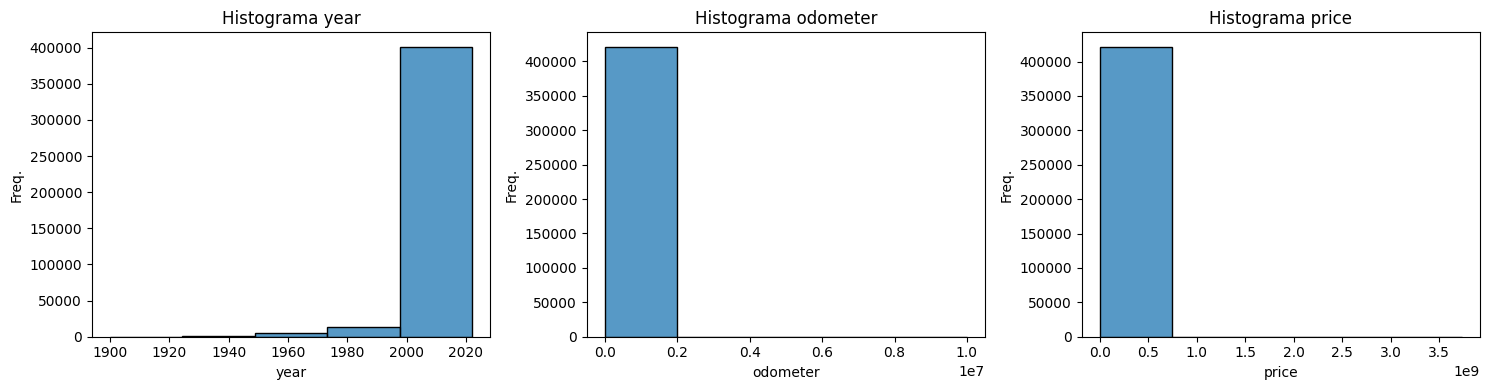

In [75]:
columnas_numericas_de_interes = ["year", "odometer", "price"]

graficar_histogramas(df, columnas_numericas_de_interes, figsize=(15, 4))

De los histogramas podemos determinar que la mayor cant de vehiculos en este dataset fueron construidos hacia los 2000. También se nota una situación extraña en las filas de odometro y precio. Por lo que se utilizarán boxplots para verifucar los posibles outliers.

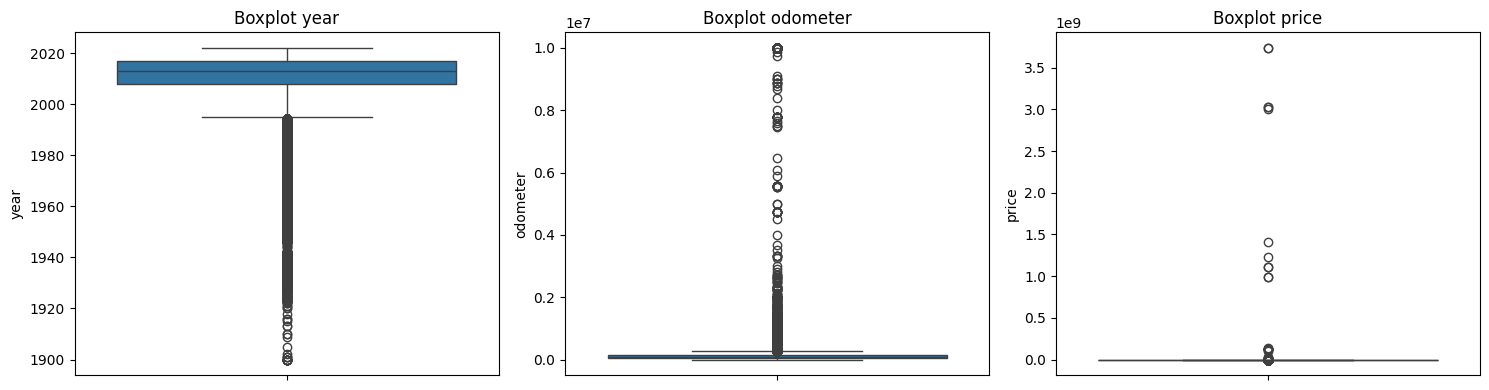

In [76]:
from eda_utils import graficar_boxplots

graficar_boxplots(df, columnas_numericas_de_interes, figsize=(15, 4))

Del boxplot de odometro, se puede notar que a lo sumo llega a 1.000.000 millas. Esto puede ser normal ya que los odómetros pueden alcanzar este valor. Los rangos que sí son extraños son los del precio, ya que hay varios vehículos en el rango de los mil millones. Esto es muy poco probable, así que se verificará tanto con estadísticas y filtrando los vehículos que superan este precio.

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,421344.0,7311491486.940636,4382999.931701,7301583321.0,7308140582.25,7312617035.5,7315252752.5,7317101084.0
price,421344.0,75983.557476,12262049.979048,0.0,5975.0,13988.0,26495.0,3736928711.0
year,421344.0,2011.225244,9.463345,1900.0,2008.0,2013.0,2017.0,2022.0
odometer,421344.0,98225.126915,214120.680946,0.0,37951.0,85827.5,133800.0,10000000.0
lat,414863.0,38.50616,5.841192,-84.122245,34.62,39.171991,42.418038,82.390818
long,414863.0,-94.663653,18.355538,-159.827728,-111.925724,-88.2816,-80.83,173.885502


Verificamos los outliers

In [78]:
obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
id,0.0,0.000000,7.297472e+09,7.325921e+09
price,7923.0,1.880411,-2.480500e+04,5.727500e+04
year,15857.0,3.763433,1.994500e+03,2.030500e+03
odometer,4354.0,1.033360,-1.058225e+05,2.775735e+05
lat,6354.0,1.531590,2.292294e+01,5.411510e+01
long,197.0,0.047486,-1.585693e+02,-3.418641e+01


Verificamos valores superiores al límite máximo en precio.

In [79]:
df[(df["price"] > 5.727500e+04) & (df["price"] < 1_000_000)]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
204,7316691442,https://bham.craigslist.org/ctd/d/tuscaloosa-2...,birmingham,https://bham.craigslist.org,58977,2019,gmc,sierra 3500,unknown,unknown,...,4wd,unknown,unknown,white,https://images.craigslist.org/01717_6qavsxdoru...,contemporary automotive address: 3427 skyla...,al,33.168322,-87.491902,2021-05-04 14:11:35+00:00
346,7315259946,https://bham.craigslist.org/ctd/d/cleveland-20...,birmingham,https://bham.craigslist.org,98900,2001,ferrari,360 modena,good,8 cylinders,...,rwd,mid-size,convertible,red,https://images.craigslist.org/00x0x_l3jiowpkvy...,"2001 ferrari 360 modena spider - $98,900 year:...",al,34.586557,-83.761243,2021-05-01 13:48:02+00:00
365,7314956487,https://bham.craigslist.org/ctd/d/springville-...,birmingham,https://bham.craigslist.org,72900,2021,chevrolet,tahoe,good,8 cylinders,...,4wd,full-size,suv,grey,https://images.craigslist.org/00q0q_aaaje1ws3d...,"2021 chevrolet tahoe 1500 z71 - $72,900 year:...",al,33.772519,-86.475191,2021-04-30 19:07:10+00:00
461,7314044610,https://bham.craigslist.org/ctd/d/richmond-202...,birmingham,https://bham.craigslist.org,99950,2021,chevrolet,corvette stingray spor,unknown,unknown,...,rwd,unknown,coupe,orange,https://images.craigslist.org/00t0t_grwgd5g10r...,2021 chevrolet corvette stingray sports car tw...,al,37.4011,-77.4615,2021-04-28 21:12:26+00:00
732,7311741403,https://bham.craigslist.org/cto/d/birmingham-j...,birmingham,https://bham.craigslist.org,100000,1984,jeep,cj7,unknown,unknown,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00p0p_h38gc2qe3i...,"selling this jeep, its on ebay with all the pi...",al,33.3813,-86.7046,2021-04-24 05:28:32+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426694,7305641060,https://wyoming.craigslist.org/ctd/d/gilberts-...,wyoming,https://wyoming.craigslist.org,59900,2014,ford,f550 xl,unknown,unknown,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00x0x_httq0bwnkq...,**for sale** 2014 ford f550 super duty 45' al...,wy,42.117529,-88.436611,2021-04-12 15:35:09+00:00
426716,7305433671,https://wyoming.craigslist.org/ctd/d/fort-mead...,wyoming,https://wyoming.craigslist.org,65950,2020,ford,f450,like new,8 cylinders,...,4wd,full-size,truck,blue,https://images.craigslist.org/00d0d_ce3fc2lkqv...,here is a 2020 ford superduty f-450 crew cab x...,wy,44.415366,-103.522882,2021-04-12 00:46:14+00:00
426778,7303328806,https://wyoming.craigslist.org/ctd/d/saddlestr...,wyoming,https://wyoming.craigslist.org,65995,2020,gmc,sierra,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/00c0c_8s1jscde0u...,"2020 gmc sierra 3500 sle - $65,995 year: 2020...",wy,44.354923,-106.680384,2021-04-07 20:42:53+00:00
426810,7302916705,https://wyoming.craigslist.org/ctd/d/american-...,wyoming,https://wyoming.craigslist.org,58995,2017,gmc,sierra 2500hd,unknown,8 cylinders,...,4wd,unknown,unknown,black,https://images.craigslist.org/00u0u_cti94a34ix...,2017 gmc_ sierra 2500hd_ denali l5p 4x4 ...,wy,40.376357,-111.806112,2021-04-07 00:34:18+00:00


Si bien existen varios valores por encima del límite máximo para el precio, los valores indicados aún parecen ser razonables, así que se procede a verificar los vehículos con un precio de 1.000.000

In [80]:
df[(df["price"] > 500_000) & (df["price"] < 1_000_000)]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
79088,7313479931,https://fortcollins.craigslist.org/cto/d/mason...,fort collins / north co,https://fortcollins.craigslist.org,655000,2010,chrysler,town & country,good,6 cylinders,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00d0d_1ixggxaty3...,selling our 2010 chrysler town and counrty ti...,co,40.478853,-105.173998,2021-04-27 19:17:32+00:00
95119,7311936036,https://fortmyers.craigslist.org/col/ctd/d/nap...,ft myers / sw florida,https://fortmyers.craigslist.org,990000,2017,mercedes-benz,amg g 63,unknown,8 cylinders,...,4wd,unknown,suv,white,https://images.craigslist.org/00p0p_4xcfvqdgil...,2017 mercedes-benz amg g 63 suv2017 mercedes-b...,fl,26.1579,-81.766548,2021-04-24 17:12:08+00:00
106361,7313051670,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,516999,2016,unknown,lambo aventador sv roadster,like new,12 cylinders,...,4wd,full-size,convertible,white,https://images.craigslist.org/00n0n_egpwhfc9nn...,"serious/ready buyers, please reach out via cal...",fl,28.4637,-81.3948,2021-04-26 21:40:47+00:00
149860,7313726518,https://bloomington.craigslist.org/cto/d/bedfo...,bloomington,https://bloomington.craigslist.org,566567,2006,chrysler,300,unknown,unknown,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/01010_becpaqri2y...,good car 130k miles 5.7 v8needs nothing runs a...,in,38.8729,-86.4871,2021-04-28 09:36:20+00:00
208617,7315966576,https://saginaw.craigslist.org/cto/d/midland-2...,saginaw-midland-baycity,https://saginaw.craigslist.org,554900,2019,unknown,f250 xlt crewcab,excellent,8 cylinders,...,4wd,unknown,pickup,white,https://images.craigslist.org/00u0u_gbhhsmui1m...,2019 f250 xlt with new boss plow. used twice f...,mi,43.6375,-84.1979,2021-05-02 22:30:41+00:00
307513,7316966675,https://texoma.craigslist.org/cto/d/van-alstyn...,texoma,https://texoma.craigslist.org,777777,2012,gmc,sierra,unknown,unknown,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00y0y_l8tnanwggi...,* buy / finance / rent to own * no credit chec...,ok,33.4292,-96.5486,2021-05-04 21:49:32+00:00
307671,7308585322,https://texoma.craigslist.org/cto/d/van-alstyn...,texoma,https://texoma.craigslist.org,777777,2012,gmc,sierra,unknown,unknown,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00y0y_l8tnanwggi...,* buy / finance / rent to own * no credit chec...,ok,33.4292,-96.5486,2021-04-18 01:54:19+00:00
416145,7317067334,https://eauclaire.craigslist.org/cto/d/dallas-...,eau claire,https://eauclaire.craigslist.org,999999,2006,ford,f-350,unknown,8 cylinders,...,unknown,unknown,unknown,unknown,https://images.craigslist.org/00l0l_kwwcx6kq54...,"new hpop, new turbo, up-pipe and a pile of sen...",wi,45.263513,-91.792354,2021-05-05 01:57:43+00:00


Analizando los precios de los vehículos y sus precios respectivamente, es altamente probable que estos vehículos tengan un precio incorrecto. Adicionalmente, estos outliers podrían impactar negativamente en la predicción de precio en los modelos más adelantes. Para asegurar que se incluye los datos que sean probablemente válidos, se opta por eliminar las filas cuyos precios sean mayores al límite máximo del rango intercuartil de precios.

In [81]:
df.drop(df[(df["price"] > 100_000)].index, inplace=True)

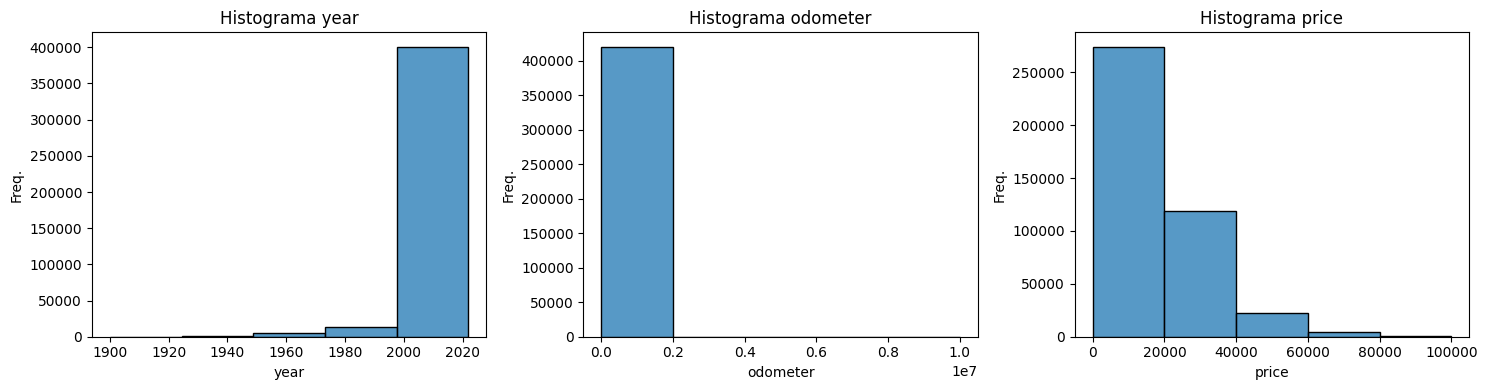

In [82]:
graficar_histogramas(df, columnas_numericas_de_interes, figsize=(15, 4))

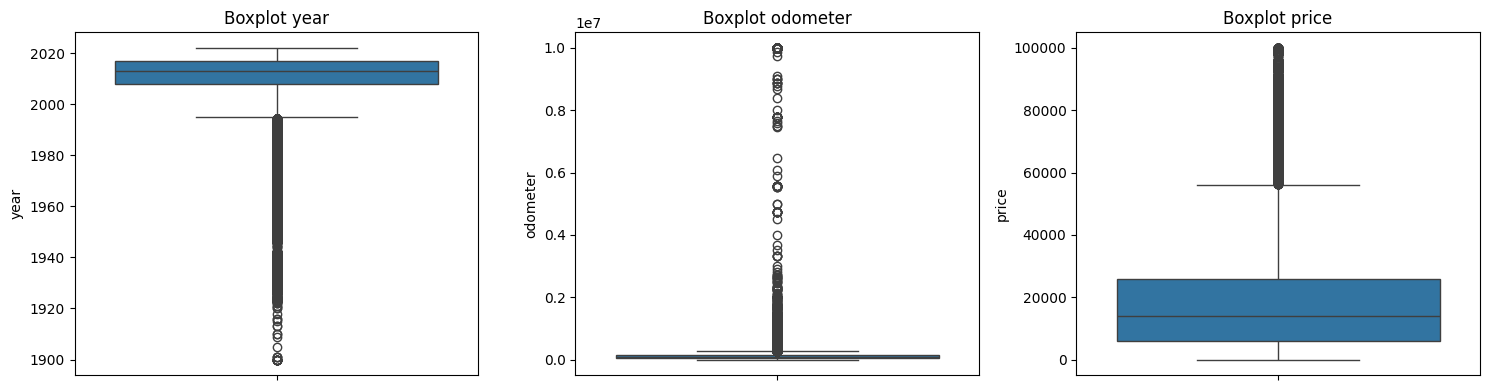

In [83]:
graficar_boxplots(df, columnas_numericas_de_interes, figsize=(15, 4))

In [84]:
obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
id,0.0,0.000000,7.297469e+09,7.325923e+09
price,7741.0,1.840042,-2.412500e+04,5.607500e+04
year,15775.0,3.749730,1.994500e+03,2.030500e+03
odometer,4334.0,1.030195,-1.057620e+05,2.776620e+05
lat,6346.0,1.532029,2.292570e+01,5.411050e+01
long,197.0,0.047559,-1.585673e+02,-3.418765e+01


De estos datos, ya se puede visualizar que los rangos de precio son un poco más entendibles.

Analizamos ahora relaciones entre columnas.

In [85]:
print(columnas_numericas_de_interes)

['year', 'odometer', 'price']


In [86]:
# Cálculo de la correlación de Pearson
correlation_matrix = df[[*columnas_numericas_de_interes]].corr(method='pearson')
print(correlation_matrix)

              year  odometer     price
year      1.000000 -0.156951  0.291441
odometer -0.156951  1.000000 -0.147527
price     0.291441 -0.147527  1.000000


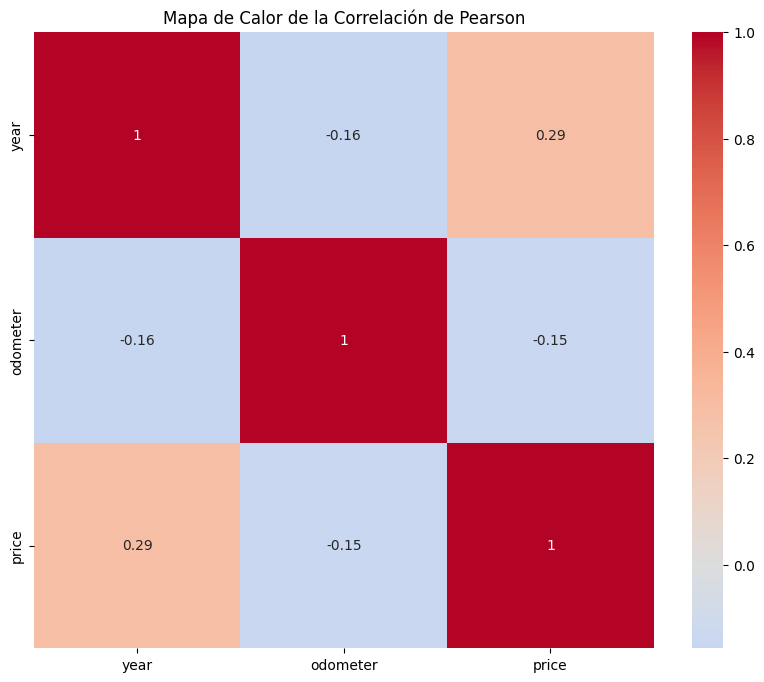

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

De este gráfico, podemos ver una leve correlación entre el precio y el año. No obstante, no es muy alta.

Creamos un gráfico de dispersión entre year y price.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_61481/3563604368.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


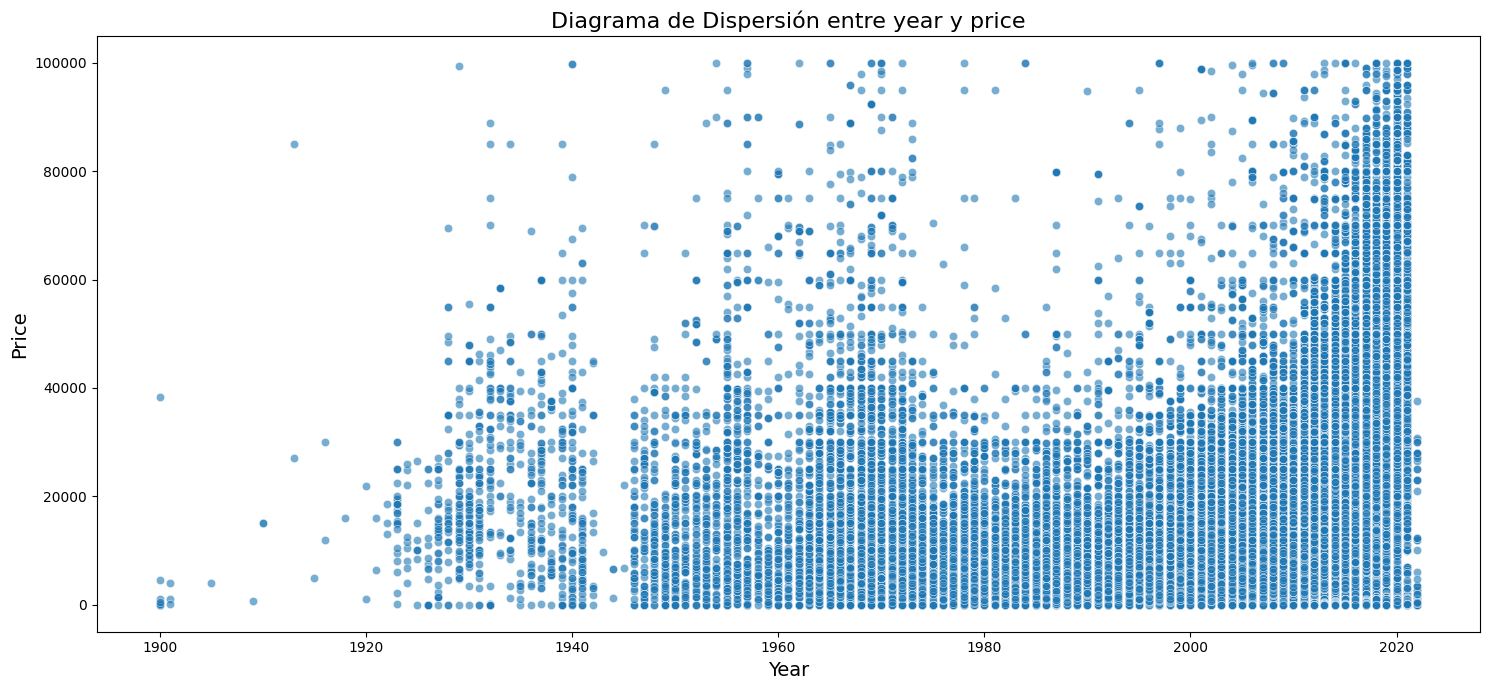

In [88]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_year_price = df[["year", "price"]].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x="year",
    y="price",
    data=df_scatter_year_price,
    alpha=0.6, 
    palette='Set1',
)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre year y price', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

del df_scatter_year_price


De este gráfico efectivamente podemos notar que el rango de precio incrementa con el año del vehículo, aunque de igual manera existe mucha dispersión en los valores, especialmente hacia los años más recientes

Mostramos ahora un gráfico de línea para visualizar los precios promedio por año.

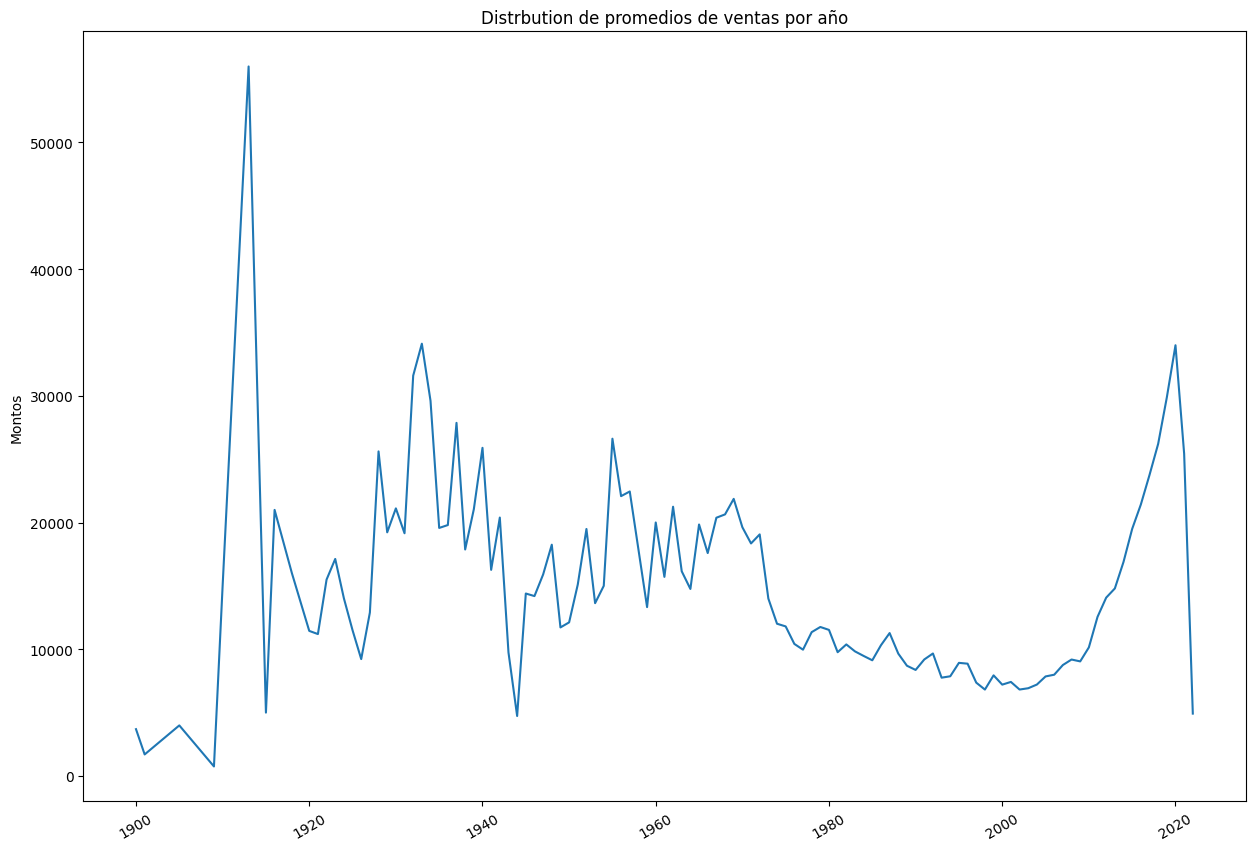

In [89]:
df_agrupado_anho = df.groupby("year")["price"].mean().reset_index().sort_values("year", ascending=True)

plt.figure(figsize=(15, 10))
plt.plot(df_agrupado_anho["year"], df_agrupado_anho["price"])

plt.ylabel("Montos")
plt.xticks(rotation=30)

plt.title("Distrbution de promedios de ventas por año")
plt.show()

del df_agrupado_anho


Realizamos un diagrama de dispersión entre el odómetro y los precios.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_61481/2584826196.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


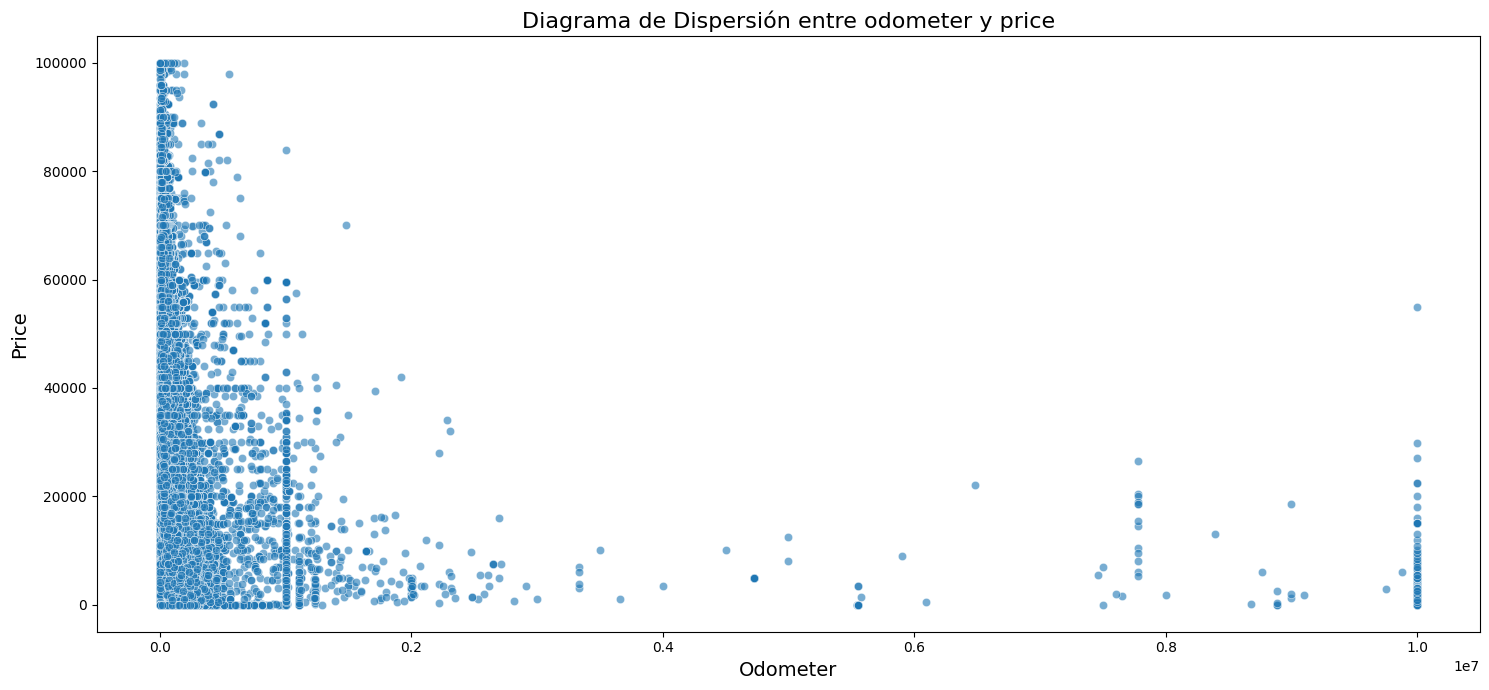

In [90]:
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_odometer_price = df[["odometer", "price"]].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 7))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(
    x="odometer",
    y="price",
    data=df_scatter_odometer_price,
    alpha=0.6, 
    palette='Set1',
)

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre odometer y price', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

del df_scatter_odometer_price

De este gráfico, se puede notar que la medición del odómetro tiene una leve influencia en el precio ya cuando las millas recorridas es superior a los 200.000. Se puede notar que la distribución de precios se reduce drásticamente. Por lo que este parámetro también puede ser un parámetro importante para crear un modelo de predicción.

Realizamos también un gráfico de barras mostrando el precio promedio

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_61481/2965578076.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado_fabricante = df.groupby("manufacturer")["price"].mean().reset_index().sort_values("price", ascending=False)


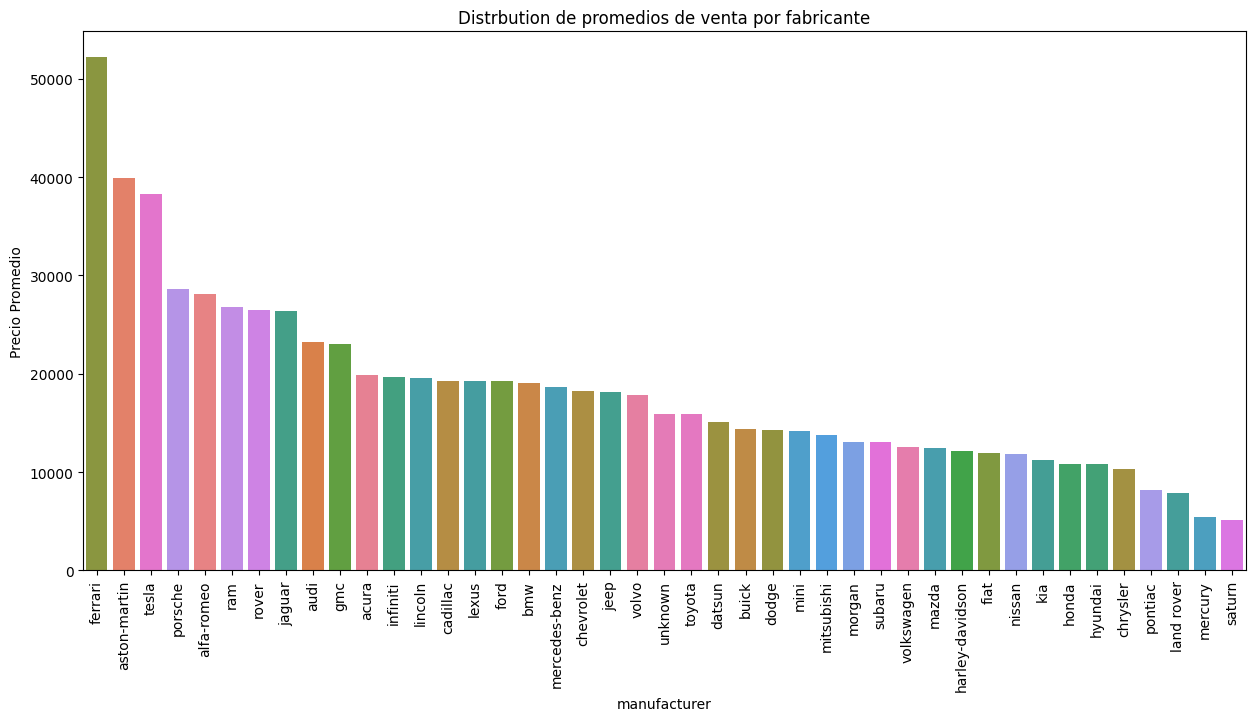

In [91]:
df_agrupado_fabricante = df.groupby("manufacturer")["price"].mean().reset_index().sort_values("price", ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(
    df_agrupado_fabricante,
    x="manufacturer",
    y="price",
    hue="manufacturer",
    order=df_agrupado_fabricante.sort_values("price", ascending=False).manufacturer
)

plt.ylabel("Precio Promedio")
plt.xticks(rotation=90)

plt.title("Distrbution de promedios de venta por fabricante")
plt.show()

del df_agrupado_fabricante


De este gráfico, podemos notar que los mayores precios de venta los tienen ferrari, tesla, aston-martin. Hay una alta probabilidad de que el fabricante influya en el precio.

Verificamos también como influye el tipo de combustible en los precios.

/var/folders/fr/wnc6gr_54cgfhzstvy2x471r0000gn/T/ipykernel_61481/3303120304.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado_tipo_combustible = df.groupby("fuel")["price"].mean().reset_index().sort_values(by="price", ascending=False)


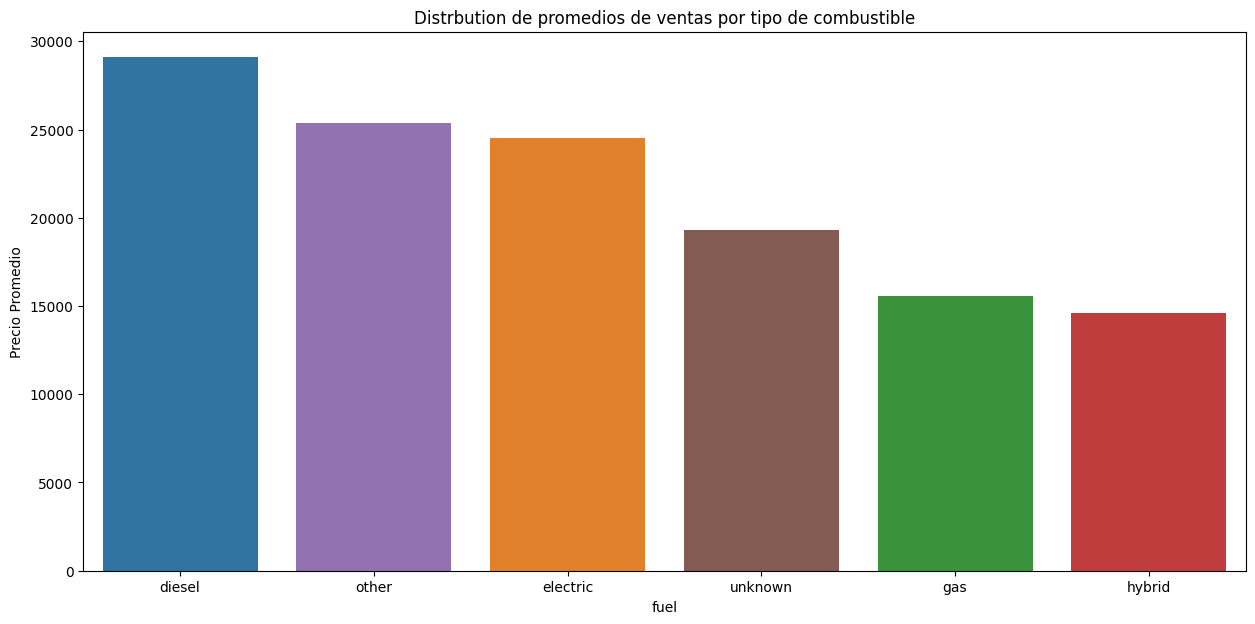

In [92]:
df_agrupado_tipo_combustible = df.groupby("fuel")["price"].mean().reset_index().sort_values(by="price", ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(
    df_agrupado_tipo_combustible,
    x="fuel",
    y="price",
    hue="fuel",
    order=df_agrupado_tipo_combustible.sort_values("price", ascending=False).fuel
)

plt.ylabel("Precio Promedio")
plt.xticks(rotation=0)

plt.title("Distrbution de promedios de ventas por tipo de combustible")
plt.show()

del df_agrupado_tipo_combustible


También se puede notar como el tipo de combustible tiene posiblemente un impacto en los precios.

### Calcular estadísticas descriptivas.

Obtenemos las estadísticas descriptivas de las columnas de interés del dataframe.

In [93]:
from eda_utils import obtener_estadisticas_descriptivas_df_es

obtener_estadisticas_descriptivas_df_es(df[["price", "year", "odometer"]]).T

,Mínimo,Máximo,Promedio,Desviación Estándar,Mediana,Coeficiente de Variación
price,0.0,100000.0,17299.276691,14745.702643,13977.0,0.852388
year,1900.0,2022.0,2011.228690,9.442688,2013.0,0.004695
odometer,0.0,10000000.0,98270.783928,213624.047052,85969.0,2.173831


## Modelado y evaluación.

### Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).

Seleccionamos primero las columnas de interés.

In [94]:
columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas

['id', 'price', 'year', 'odometer', 'lat', 'long']

In [95]:
columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas

['url',
 'region',
 'region_url',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'state']

In [96]:
columnas_numericas_prediccion = [
    # "price",
    "year",
    "odometer",
    # "lat",
    # "long",
]

columnas_categoricas_prediccion = [
    # 'url',
    'region',
    # 'region_url',
    'manufacturer',
    # 'model',
    'condition',
    'cylinders',
    'fuel',
    'title_status',
    'transmission',
    # 'VIN',
    'drive',
    'size',
    'type',
    'paint_color',
    # 'image_url',
    # 'description',
    'state',
]

campo_salida = "price"

X = df[[*columnas_numericas_prediccion] + [*columnas_categoricas_prediccion]]
y = df[campo_salida]

Convertimos las columnas y las escalamos, y dividimos el dataset en entrenamiento y test

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, columnas_numericas_prediccion),
        ("cat", categorical_transformer, columnas_categoricas_prediccion),
    ]
)

X_transformed = preprocessor.fit_transform(X)

# Dividimos el dataset en 80% para entrenamiento y 20% para testeo de acuerdo a lo indicado en el ejercicio.
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,
    y,
    test_size=0.3,
    random_state=0,
)

#### Modelo Regresión Lineal:

In [98]:
from sklearn.linear_model import LinearRegression

modelo_reg_lineal = LinearRegression()
modelo_reg_lineal.fit(X_train, y_train)

LinearRegression()

Rendimiento

In [99]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# Realizar predicciones
y_pred_reg_lineal = modelo_reg_lineal.predict(X_test)

# Evaluar el modelo
rmse_reg_lineal = root_mean_squared_error(y_test, y_pred_reg_lineal)
mse_reg_lineal = rmse_reg_lineal ** 2
r2_reg_lineal = r2_score(y_test, y_pred_reg_lineal)
mae_reg_lineal = mean_absolute_error(y_test, y_pred_reg_lineal)

print(f'Error Cuadrático Medio: {mse_reg_lineal}')
print(f'Error Cuadrático Medio Raíz: {rmse_reg_lineal}')
print(f'R-cuadrado: {r2_reg_lineal}')
print(f'Error Absoluto Medio: {mae_reg_lineal}')

Error Cuadrático Medio: 136446597.35738945
Error Cuadrático Medio Raíz: 11681.035799850519
R-cuadrado: 0.37209083137315946
Error Absoluto Medio: 8285.690988992328


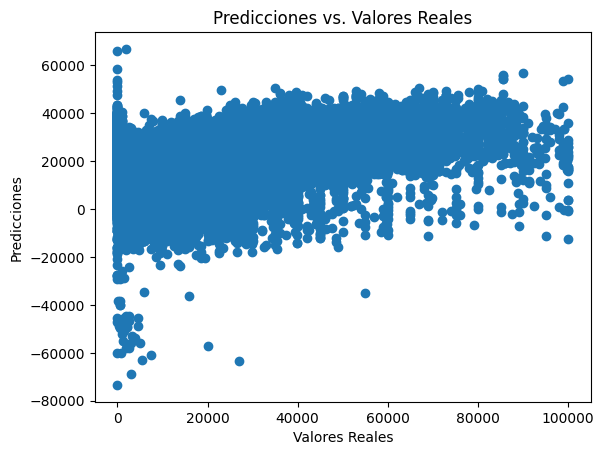

In [100]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_reg_lineal)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

Al parecer, según las estadísticas, este metodo posee un gran error, y se pueden ver también valores negativos, lo cual no es esperado. Por este motivo, la regresión lineal probablemente no es el mejor modelo.

#### Modelo Random Forest Regressor:

In [101]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(n_estimators=40, random_state=0)
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=0)

Rendimiento

In [102]:
# Realizar predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mse_rf = rmse_rf ** 2
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Error Cuadrático Medio: {mse_rf}')
print(f'Error Cuadrático Medio Raíz: {rmse_rf}')
print(f'R-cuadrado: {r2_rf}')
print(f'Error Absoluto Medio: {mae_rf}')

Error Cuadrático Medio: 42262402.91703434
Error Cuadrático Medio Raíz: 6500.954000532102
R-cuadrado: 0.8055140194496726
Error Absoluto Medio: 3079.3308988692015


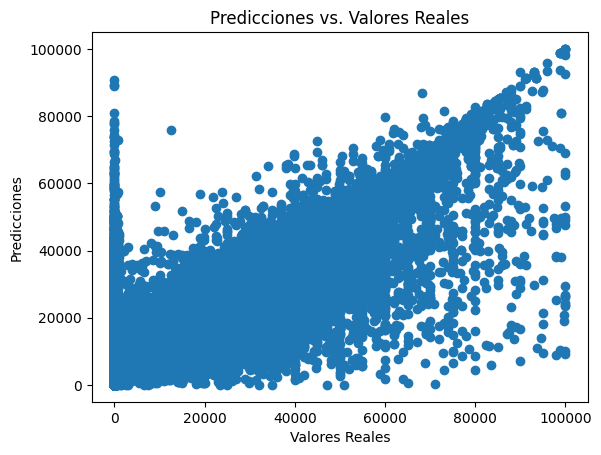

In [103]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

### Evaluar los modelos utilizando MSE, RMSE, y R^2.

In [104]:
df_resultados = pd.DataFrame([
    ("Regresión Lineal", r2_reg_lineal, rmse_reg_lineal, mse_reg_lineal, mae_reg_lineal),
    ("Random Forests", r2_rf, rmse_rf, mse_rf, mae_rf),
], columns=["Método", "R2", "RMSE", "MSE", "MAE"])

df_resultados

,Método,R2,RMSE,MSE,MAE
0,Regresión Lineal,0.372091,11681.035800,1.364466e+08,8285.690989
1,Random Forests,0.805514,6500.954001,4.226240e+07,3079.330899


### Seleccionar el mejor modelo basado en las métricas de evaluación.

De ambos modelos, se puede determinar que el que tiene menor MAE y mayor R2 es el de Random Forests, por lo cual éste es el método elegido.

## 5. Optimización del Modelo:

Debido a la gran cantidad de tiempo que requiere usar la combinación entre RandomForestRegressor y GridSearchCV, solo se seleccionan unos pocos parámetros. Para poder usarlo con más flexibilidad, se debe disponer de más tiempo o mejores recursos.

In [105]:
from sklearn.model_selection import GridSearchCV

modelo_rf_gscv = RandomForestRegressor(random_state=0)

param_grid = { 
    'n_estimators': [20, 40],
}


CV_rfc = GridSearchCV(estimator=modelo_rf_gscv, param_grid=param_grid, cv=5, verbose=2)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ....................................n_estimators=20; total time= 9.2min
[CV] END ....................................n_estimators=20; total time= 9.1min
[CV] END ....................................n_estimators=20; total time= 9.2min
[CV] END ....................................n_estimators=20; total time= 9.2min
[CV] END ....................................n_estimators=20; total time= 9.1min
[CV] END ....................................n_estimators=40; total time=18.2min
[CV] END ....................................n_estimators=40; total time=18.2min
[CV] END ....................................n_estimators=40; total time=18.4min
[CV] END ....................................n_estimators=40; total time=18.3min
[CV] END ....................................n_estimators=40; total time=18.3min


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'n_estimators': [20, 40]}, verbose=2)

In [111]:
params = CV_rfc.best_params_

params

{'n_estimators': 40}

In [112]:
CV_rfc.best_score_

np.float64(0.7939662628636769)

In [113]:
model_rf_params_cv = RandomForestRegressor(**params, random_state=0)

model_rf_params_cv.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, random_state=0)

Rendimiento:

In [114]:
# Realizar predicciones
y_pred_rf_params_cv = model_rf_params_cv.predict(X_test)

# Evaluar el modelo
rmse_rf_params_cv = root_mean_squared_error(y_test, y_pred_rf_params_cv)
mse_rf_params_cv = rmse_rf_params_cv ** 2
r2_rf_params_cv = r2_score(y_test, y_pred_rf_params_cv)
mae_rf_params_cv = mean_absolute_error(y_test, y_pred_rf_params_cv)

print(f'Error Cuadrático Medio: {mse_rf_params_cv}')
print(f'Error Cuadrático Medio Raíz: {rmse_rf_params_cv}')
print(f'R-cuadrado: {r2_rf_params_cv}')
print(f'Error Absoluto Medio: {mae_rf_params_cv}')

Error Cuadrático Medio: 42262402.91703434
Error Cuadrático Medio Raíz: 6500.954000532102
R-cuadrado: 0.8055140194496726
Error Absoluto Medio: 3079.3308988692015


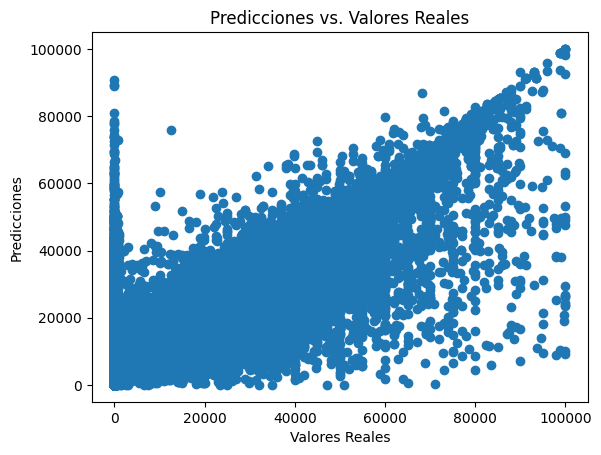

In [115]:
# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_rf_params_cv)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()